In [7]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    """
    Captures a photo using the webcam via JavaScript and saves it locally.
    """
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

Photo saved to photo.jpg
Displaying the sketch:


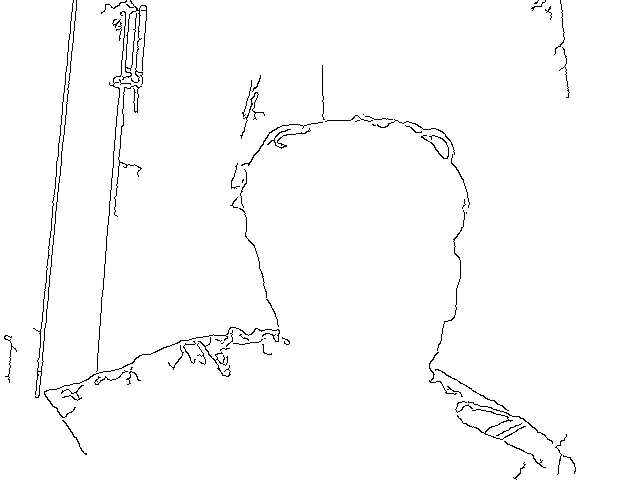

In [8]:
def live_sketch(img):
    """
    Converts a given image into a sketch-like representation.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(gray_blur, 10, 70)
    _, mask = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

# Main flow for capturing and processing the image.
try:
    # Take a photo using the webcam.
    photo_filename = take_photo()
    print(f"Photo saved to {photo_filename}")

    # Load the captured photo for processing.
    img = cv2.imread(photo_filename)
    if img is not None:
        # Generate and display the live sketch.
        sketch = live_sketch(img)
        print("Displaying the sketch:")
        cv2_imshow(sketch)
    else:
        print("Error loading the captured image.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  23987      0 --:--:-- --:--:-- --:--:-- 24117
Displaying the logo:


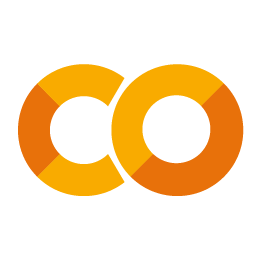

In [10]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
logo_img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
if logo_img is not None:
        print("Displaying the logo:")
        cv2_imshow(logo_img)
else:
        print("Error loading the logo image.")